<a href="https://colab.research.google.com/github/chandana2005/Car_Price_Prediction/blob/main/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')


In [ ]:
data = pd.read_csv('/content/car_price_presiction.csv')
print("Shape of data:", data.shape)
data.head()


Shape of data: (301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.info()
print("\nMissing values:\n", data.isnull().sum())
print("\nDuplicate rows:", data.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB

Missing values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Duplicate rows: 2


In [ ]:
data.drop_duplicates(inplace=True)

if 'Car_Name' in data.columns:
    data.drop('Car_Name', axis=1, inplace=True)
data.columns = data.columns.str.strip()
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


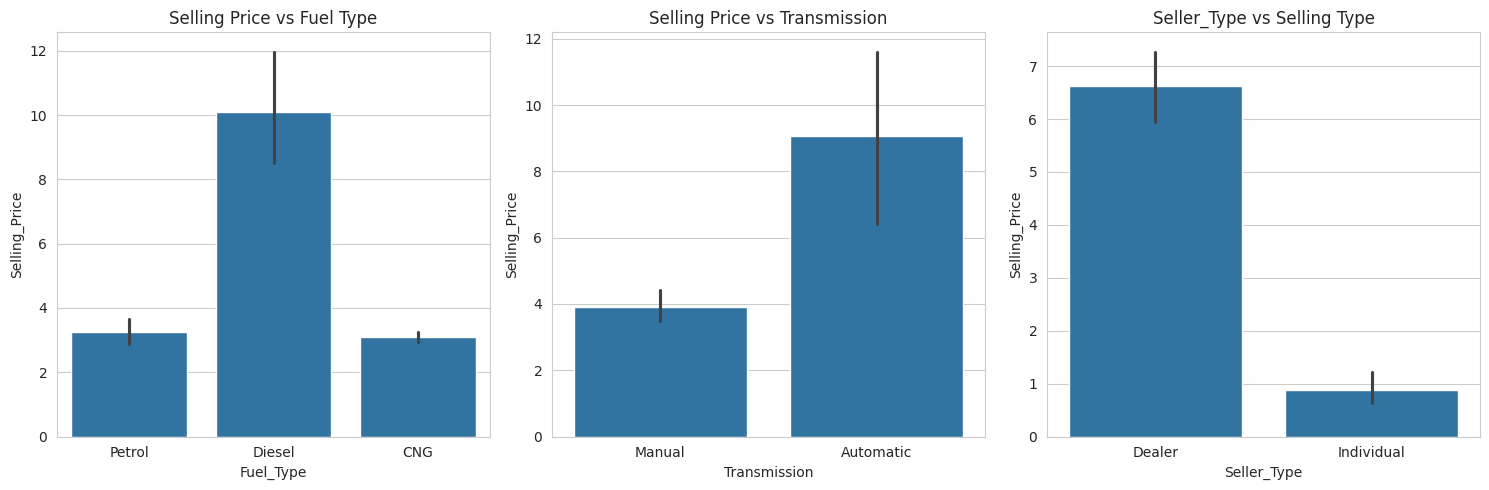

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title('Selling Price vs Fuel Type')

plt.subplot(1,3,2)
sns.barplot(x='Transmission', y='Selling_Price', data=data)
plt.title('Selling Price vs Transmission')

plt.subplot(1,3,3)
sns.barplot(x='Seller_Type', y='Selling_Price', data=data)
plt.title('Seller_Type vs Selling Type')

plt.tight_layout()
plt.show()


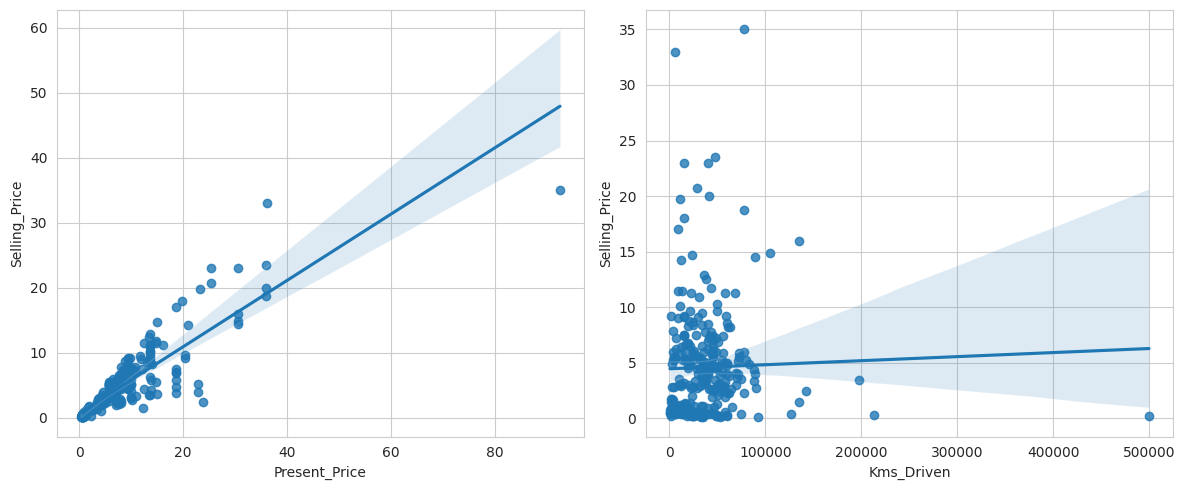

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.regplot(x='Present_Price', y='Selling_Price', data=data)

plt.subplot(1,2,2)
sns.regplot(x='Kms_Driven', y='Selling_Price', data=data)

plt.tight_layout()
plt.show()


In [ ]:
data['Car_Age'] = data['Year'].max() - data['Year']
data.drop('Year', axis=1, inplace=True)

data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,4
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,5
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,7
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,4


In [ ]:
data = pd.get_dummies(data, drop_first=True)
data.head()


,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,4,False,True,False,True
1,4.75,9.54,43000,0,5,True,False,False,True
2,7.25,9.85,6900,0,1,False,True,False,True
3,2.85,4.15,5200,0,7,False,True,False,True
4,4.60,6.87,42450,0,4,True,False,False,True


In [ ]:
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (239, 8)
Testing data shape: (60, 8)


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} -> R2 Score: {r2:.3f}, RMSE: {rmse:.3f}")


Linear Regression -> R2 Score: 0.753, RMSE: 2.524
Decision Tree -> R2 Score: 0.670, RMSE: 2.916
Random Forest -> R2 Score: 0.547, RMSE: 3.415


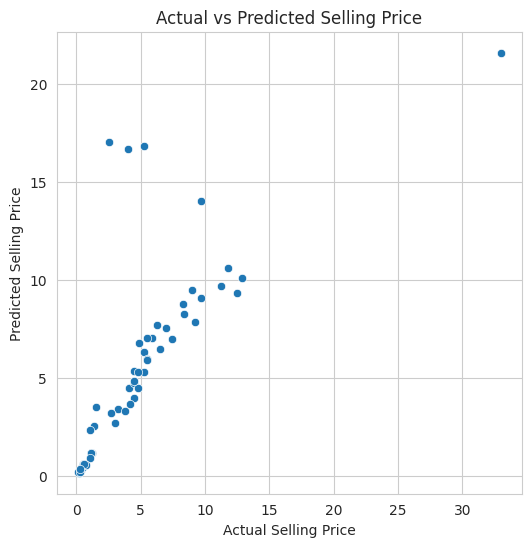

Final R2 Score: 0.547390441726516
Final RMSE: 3.4154391854733226


In [ ]:
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()

print("Final R2 Score:", r2_score(y_test, y_pred))
print("Final RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


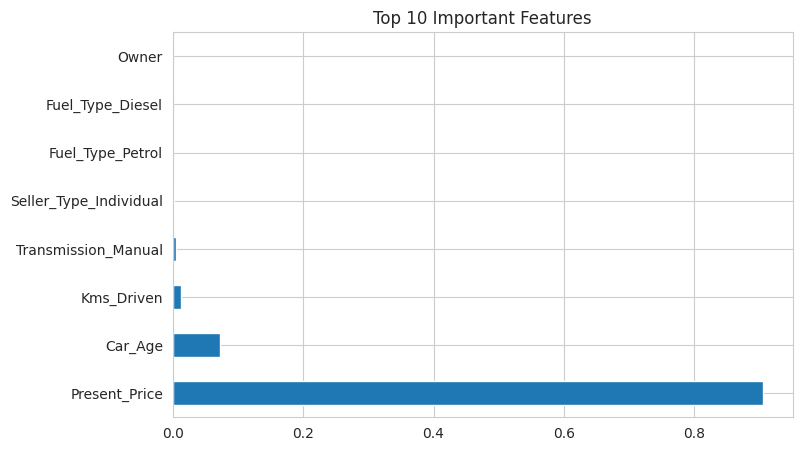

,0
Present_Price,0.905623
Car_Age,0.071841
Kms_Driven,0.013396
Transmission_Manual,0.005249
Seller_Type_Individual,0.002081
Fuel_Type_Petrol,0.000914
Fuel_Type_Diesel,0.000886
Owner,0.000010


In [ ]:
feat_importance = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
feat_importance.head(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

feat_importance.head(10)
